# PC 7 : Résolution numérique d'équations différentielles ordinaires

**<big> Préparation avant la PC :</big>**
**Les question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC du 19/10.

**<big><font color=black><span style="background-color:skyblue">À rendre</span></font> après la PC :</big>**
**Les exercices 1, 2 et 3 contiennent des parties <font color=black><span style="background-color:skyblue">à rendre</span></font> avant le 30/10 à 20h00 avec ceux de la PC8. Les questions 2 et 4 de l'exercice 3 sont en <font color=black><span style="background-color:deepskyblue">bonus</span></font>**.

In [1]:
import math
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np
# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt
# Cette fonction renvoi le résultat des itérations de Newton
from scipy.optimize import newton
from scipy.optimize import curve_fit

## Exercice 1 : Autour de Cauchy-Lipschitz

### Question 1 : Exemples et contrexemples

Pour chacun des systèmes ci-dessous, répondre aux questions suivantes. Existe-t-il une solution? Si oui, est-elle unique, et quel est l'intervalle maximal de définition?

$$\begin{array}{lll}
\left\{
\begin{array}{ll}
y'(t) &= \text{sign}(y(t)) \sqrt{\vert y(t)\vert}, \\
y(0) &= 0,
\end{array}
\right.
\qquad{} 
&(a) \\ \\  
\left\{
\begin{array}{ll}
y'(t) &= y(t)^2, \\
y(0) &= 1,
\end{array}
\right.
\qquad{} &(b) \\ \\
\left\{
\begin{array}{ll}
y'(t) &= y(t)(y(t)-2)(y(t)-t), \\
y(0) &= 1,
\end{array}
\right.
\qquad{} &(c) \\ \\ 
\left\{
\begin{array}{ll}
y''(t) &= -y(t), \\
y(0) &= 1, \\
y'(0) &= -1,
\end{array}
\right.
\qquad{} & (d) \\ \\
\left\{
\begin{array}{ll}
y''(t) &= -y(t), \\
y(0) &= 1, \\
y(\pi) &= -1.
\end{array}
\right.
\qquad{}& (e)
\end{array}
$$

<div class="alert alert-block alert-info">
    <h3>a</h3>
    On remarque que $y(t) = 0$ est solution. $\\$
    Alors, supposons $y(t) > 0$. On a
    $$ \frac{y'(t)}{\sqrt{y(t)}} = 1 \iff 2 \frac{d}{dt} \sqrt{y(t)} = 1 \iff y(t) = \frac{t^2}{4}$$
    Analogiquement, pour $y(t) < 0$ on a la solution $ y(t) = -\frac{t^2}{4} $. $\\$
    Alors on n'a pas unicité de la solution. L'intervalle maximal de définition des solutions est $\mathbb{R}$.
    <h3>b</h3>
    D'abord, on remarque que $f(y,t)$ est de classe $\mathcal{C}^1$. Donc, par Cauchy-Lipschitz, il Existe une unique solution maximale.
    $$ \frac{y'(t)}{y(t)^2} = 1 \iff \frac{1}{y(t)} - \frac{1}{y(0)} = -t \iff y(t) = \frac{1}{1-t} $$
    d'où l'intervalle maximale de définition est $(-\infty, 1)$.
    <h3>c</h3>
    On remarque que $g(t) = 0$ et $g(t) = 2$ sont solutions de $g'(t) = g(t)(g(t)-2)(g(t)-t)$.
    Alors, par Cauchy-Lipschitz, si $y(0) = 1$, on a $0 < y(t) < 2 \quad \forall t \in \mathbb{R}$.
    Donc, $y(t)$ est bornée $\implies \exists$ unique solution global.
    <h3>d</h3>
    Posons $$ F(t) = \begin{bmatrix} y(t) \\ y'(t) \end{bmatrix} $$
    on a $$\begin{align}
    \begin{cases}
    F'(t) &= \begin{bmatrix}0 & 1 \\ -1 & 0 \end{bmatrix} F(t)\\
    F(0) &= \begin{bmatrix} 1 \\ -1 \end{bmatrix}.
    \end{cases}
    \end{align}$$
    On remarque que $\begin{bmatrix}0 & 1 \\ -1 & 0 \end{bmatrix}$ est la matrice de rotation $R_\theta =  \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$ pour $\theta = -\frac{\pi}{2}$. $\\$
    On remarque qu’on peut réecrire le problème en utilisant des nombres complexes.
    Alors, posons $u(t) = y(t) + iy'(t)$.
    $$\begin{align}
    \begin{cases}
    u'(t) &= e^{-i\frac{\pi}{2}}u(t)\\
    u(0) &= 1 - i = \sqrt{2}e^{-i\frac{\pi}{4}}
    \end{cases}
    \end{align}$$
    On a $$ \ln(u(t)) - \ln\left(\sqrt{2}\right) + i\frac{\pi}{4} = -it \iff u(t) = \sqrt{2}e^{-i\left(\frac{\pi}{4} + t\right)} = \cos(t) - \sin(t) + i(-\cos(t) - \sin(t)).$$
    On en conclue que $y(t) = \cos(t) - \sin(t)$ est solution unique globale. $\\$
    <h3>e</h3>
    On remarque qu'il s'agit de l'équation differentielle d'un oscillateur harmonique simple $$y''(t) = -\omega^2 y(t)$$ avec $\omega = 1$. $\\$
    Donc la solution générale est $ y(t) = A\cos(t) + B\sin(t)$.
    Avec les conditions de bord, on en conclue que $$ y(t) = \cos(t) + B\sin(t) \quad \forall B \in \mathbb{R}$$ sont les solutions avec intervalle maximale d'existence $\mathbb{R}$.
</div>

### Question 2 : Tests numériques

On considère un problème générale de la forme 

$$y' = f(t,y) $$

sur un intervale $t \in [0,T[$.

1) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**
- Implémenter la méthode d'Euler explicite pour obtenir une solution approchée. On prendra les $t_n$ obtenus avec un pas uniforme $\Delta t = \frac{1}{N}$ avec $N=2^5$, puis $N=2^{10}$.
- Afficher sur un même graphique les solutions approchées obtenues pour un second membre $f(t,y) = y$, ainsi que la solution thérique.

*Indications pour l'implémentation :* 
- Vérifier que votre dernier temps $t_N$ est bien égal à $1$ et que $t_0$ est bien égale à $0$.
- Pour ce choix de fonction $f$, que valent les $y_n$? Vérifier que vous obtenez bien numériquement cette suite.

In [2]:
def f_1(t,x):
    return x

In [3]:
def Euler_explicite(f, y0, t):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler explicite
    ----------   
    parametres:
    f   : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0 : valeur au temps t_0
    t   : tableau contenant les temps t_0 = 0, t_1, ..., t_N = T
    
    valeurs de retour:
    tab_y : tableau contenant les valeurs y_n à chaque itération
    """
    n = len(t)
    tab_y = np.zeros(n)
    
    tab_y[0] = y0
    for i in range(1, n):
        delta_tn = t[i] - t[i-1]
        tab_y[i] = tab_y[i-1] + delta_tn*f(t[i-1], tab_y[i-1])
    return tab_y

In [4]:
# Tests unitaire : 
# -construire les tn et vérifier que tN=1
# -vérifier la valeurs numérique des yn

def test_Euler_explicite(n, tn, y0): #on supposera pour le test que f=f_1
    
    t = np.zeros(n + 1)
    t[0] = 0
    
    delta_t = tn/n
    for i in range(1, n+1):
        t[i] = t[i-1] + delta_t
    assert(t[n] == tn)
    
    tab_y = Euler_explicite(f_1, y0, t)
    tab_y_attendu = y0*np.power( np.full(n+1, 1 + delta_t) , np.arange(n+1)) #y[i] = (1 + delta_t)*y[i-1] => y[i] = (1+delta_t)^i * y0
    assert( np.array_equal(np.round(tab_y - tab_y_attendu), np.zeros(n+1)) == True )
    
    return t, tab_y
    
#cas n=32
t1, tab_y1 = test_Euler_explicite(n=32, tn=1, y0=1)

#cas n=1024
t2, tab_y2 = test_Euler_explicite(n=1024, tn=1, y0=1)

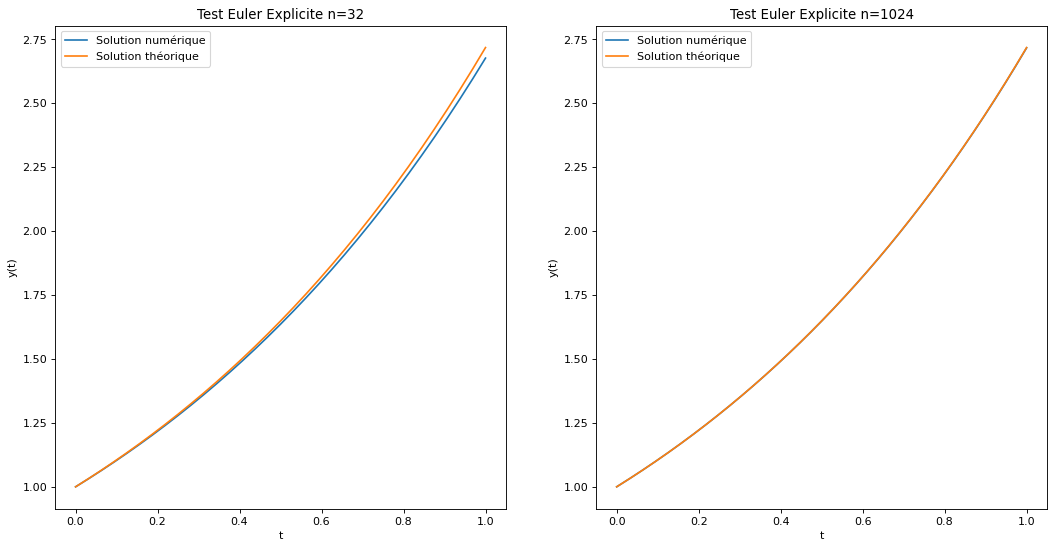

In [5]:
# Tracer la solution numérique avec les paramètres donnés et la solution théorique
plt.figure(figsize=(16, 8), dpi=80)

plt.subplot(1, 2, 1)
plt.title("Test Euler Explicite n=32")
plt.plot(t1, tab_y1 , label="Solution numérique")
plt.plot(t1,  np.exp(t1), label="Solution théorique") # y'(t) = y(t) iff y(t) = y(0)e^t
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Test Euler Explicite n=1024")
plt.plot(t2,  tab_y2, label="Solution numérique")
plt.plot(t2,  np.exp(t2), label="Solution théorique")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()

plt.show()

2) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**
Utiliser maintenant le schéma d'Euler explicite et le tester sur les cas (a) et (b) avec $\Delta t = 2^{-10}$ et $T_f = 1$. Tracer les solutions obtenues, et commenter.

In [6]:
def f_a(t,x):
    # fonction second membre dans (a)
    return np.sign(x)*np.sqrt(np.abs(x))

def f_b(t,x):
    # fonction second membre dans (b)
    return x**2

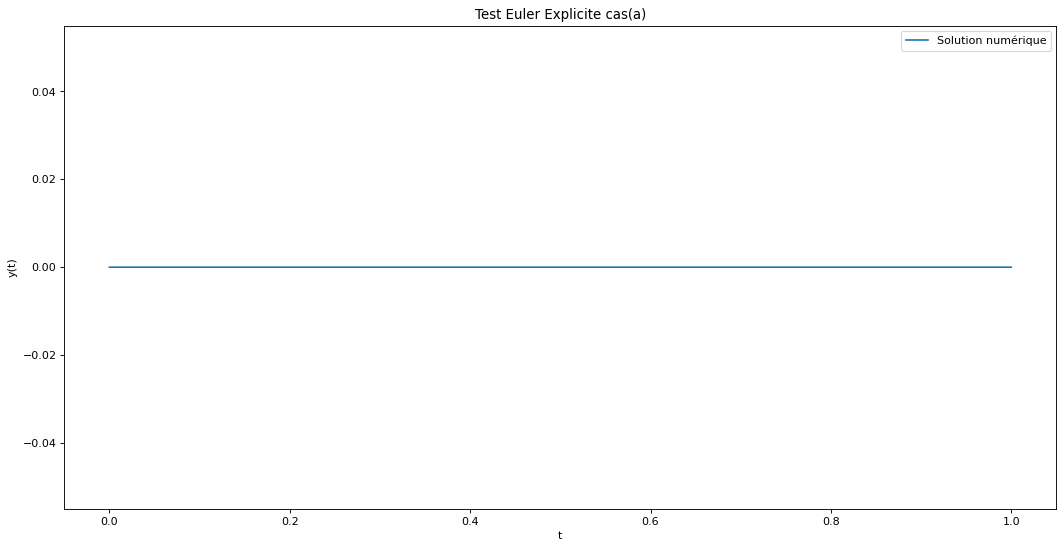

In [7]:
# Tracer la solution numérique avec les paramètres donnés dans la cas a
t = np.linspace(0, 1, 2**10 + 1)
tab_y_a = Euler_explicite(f_a, 0, t)

plt.figure(figsize=(16, 8), dpi=80)
plt.title("Test Euler Explicite cas(a)")
plt.plot(t, tab_y_a , label="Solution numérique")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

**Réponse :**



<div class="alert alert-block alert-info">
    On remarque que la méthode a convergé vers la solution $y(t) = 0$. En effet, pour les cas où l'équation admet plusiers solutions, la méthode converge vers une de ces solutions et a priori on ne sait pas laquelle.
</div>

/tmp/ipykernel_111816/947655274.py:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(t2, 1/(1 - t2), label="Solution théorique")


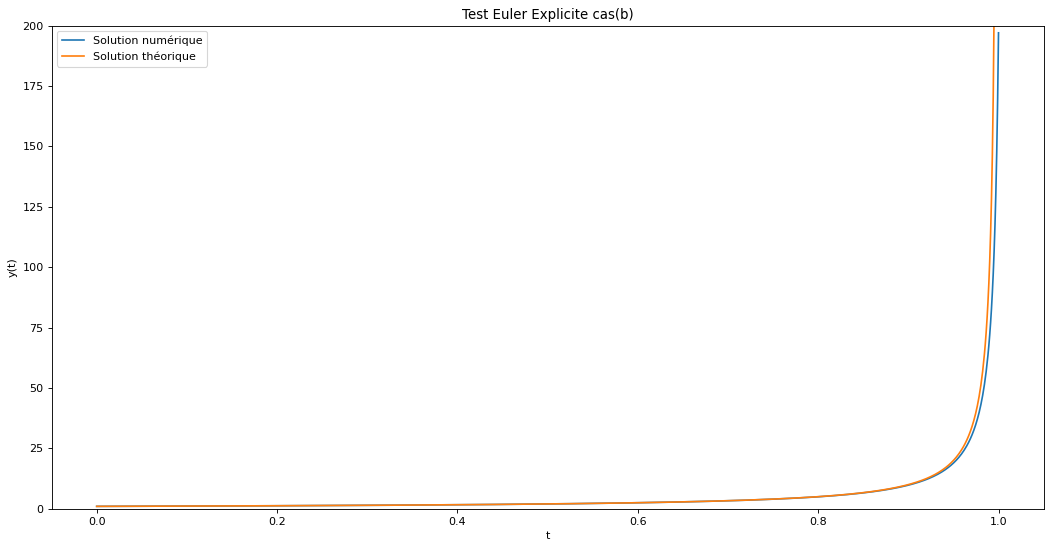

In [8]:
# Tracer la solution numérique avec les paramètres donnés dans la cas b
t = np.linspace(0, 1, 2**10 + 1)
tab_y_b = Euler_explicite(f_b, 1, t)

plt.figure(figsize=(16, 8), dpi=80)
plt.title("Test Euler Explicite cas(b)")
plt.plot(t2,  tab_y_b, label="Solution numérique")
plt.plot(t2, 1/(1 - t2), label="Solution théorique")
ax = plt.gca() #On limite l'axe y
ax.set_ylim(0, 200) #car solution theorique est non borné
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

**Réponse :** 

<div class="alert alert-block alert-info">
    Dans ce cas, la solution est unique sur l'intervalle posé. Comme la solution théorique est de classe $\mathcal{C}^2$, la méthode d'Euler explicite est d'ordre $1$ au moins. En effet, on remarque que la solution numérique a bien approche la solution théorique mais on observe que l’erreur locale augmente lorsque la solution théorique diverge.
</div>

## Exercice 2 : Consistance + stabilité $\Rightarrow$ convergence

>On considère $f\in\mathcal{C}^0(\mathbb{R}^2,\mathbb{R})$ localement lipschitzienne en la deuxième variable, et le problème de Cauchy
>
>$$ \left\{\begin{array}{l} 
y'(t) = f(t,y(t)) \\
y(t_0)=y_0, 
\end{array}\right. \qquad{} (1) $$
>
>qu'on cherche à résoudre numériquement. Dans tout cet exercice, on considère uniquement la méthode d'Euler explicite, donnée par
>
> $$ y_{n+1} = y_n + (t_{n+1} - t_n)f(t_n,y_n). $$
>
>Les différentes notions et résultats qui vont être établis se généralisent à d'autres méthodes vues en cours.
>On démontrera en particulier une partie du *théorème de Lax*, qui affirme que si un schéma est consistant, sa stabilité est une condition nécessaire et suffisante pour qu'il soit convergent.
>
>Étant donnée une subdivision $t_0<t_1<\ldots<t_{N}$, on note $\Delta t_n=t_{n+1}-t_n$.
>
>*Pour simplifier certaines questions, on pourra supposer que $f$ est de classe $\mathcal{C}^1$.*

### Question 1 : Consistance

>**Définitions :** Étant donnée une solution $y$ de (1) définie sur $[t_0,t_0+T]$, et une subdivision $t_0<t_1<\ldots<t_{N}=t_0+T$, on note pour tout $0\leq n< N$
>
> $$ \varepsilon_n = y(t_{n+1})-y(t_n)-\Delta t_n f(t_n,y(t_n)), $$
>
>c'est-à-dire l'erreur obtenue lorsqu'on applique le schéma numérique à la solution exacte $y$ aux points $t_n$, et on définit l'**erreur de consistance** $E$ comme
>
> $$ E = \sum_{n=0}^{N-1}\left\vert \varepsilon_n\right\vert. $$
>
>On dit que la méthode d'Euler explicite est **consistante** si $E\underset{\Delta t\to 0}{\longrightarrow} 0$ où $\Delta t=\max\limits_{0\leq n\leq N} \Delta t_n$. 
 
1) Dans le cas où $f$ est de classe $\mathcal{C}^1$, montrer que l'erreur de consistance est en $O(\Delta  t)$, et donc que la méthode d'Euler explicite est consistante.

2) Montrer qu'elle demeure consistante si $f$ satisfait seulement les conditions de Cauchy (continuité et Lipschité-continuité par rapport à $y$).

<div class="alert alert-block alert-info">
    On remarque que $f$ de classe $\mathcal{C}^1 \implies y$ de classe $\mathcal{C}^2$. $\\$
    Alors, par développement limité
    $$ y(t_{n+1}) = y(t_n) + y'(t_n)\Delta t_n +  \frac{1}{2}y''(t_n)\Delta t_n^2 + O(\Delta t_n^3)$$
    On a $ \epsilon_n = y(t_{n+1}) - y(t_n) - \Delta t_n y'(t_n) = y(t_{n+1}) - y(t_n) - \Delta t_n y'(t_n) $, donc
    $$ \epsilon_n \leq \frac{\Delta t_n^2}{2}\| y'' \|_\infty$$
    alors
    $$ E = \sum_{n=0}^{N-1} |\epsilon_n| \leq \frac{\Delta t}{2} \| y'' \|_\infty \sum_{n=0}^{N-1} \Delta t_n = \left( \frac{T \| y'' \|_\infty}{2} \right) \Delta t$$
    On en conclue que $E = O(\Delta t)$.
</div>

### Question 2 : Stabilité

>**Définition :** On dit que le schéma d'Euler explicite est **stable** s'il existe une constante $C>0$ qui reste bornée quand $\Delta t$ tend vers $0$, telle que, pour toute suite $\left(z_i\right)_{1\leq i\leq N}$ vérifiant
>
> $$ z_{n+1}=z_n+\Delta t_n f(t_n,z_n)+\delta_n, \qquad{} \forall~0\leq n<N, $$
>
>on ait
>
> $$ \max\limits_{0\leq n\leq N}\left\vert y_n-z_n\right\vert \leq C\left(\left\vert y_0-z_0\right\vert + \sum_{n=0}^{N-1}\left\vert \delta_n\right\vert\right), $$
>

1) **Lemme de Gronwall discret :** Soit $\left(\theta_n\right)$ une suite de nombre réels positifs et $L>0$ tels que

$$ \theta_{n+1}\leq (1+L\Delta t_n)\theta_n+\left\vert \delta_n\right\vert,\qquad\forall n\geq 0. $$

Montrer que

$$ \theta_n\leq e^{L(t_n-t_0)}\theta_0 + \sum_{i=0}^{n-1}e^{L(t_n-t_{i+1})}\left\vert \delta_i\right\vert. $$

2) En déduire que, si $f$ est globalement lipschitzienne en la deuxième variable, la méthode d'Euler explicite est stable.

<div class="alert alert-block alert-info">
    On procède par recurrence. $\\$
    Pour $n=0$ on a
    $$ \theta_0 \leq e^{L(t_0-t_0)}\theta_0 = \theta_0. $$
    Supposons que l'inegalité est vrai pour $n = k \in \mathbb{N}$. Alors
    $$\begin{align}
    \theta_{k+1} &\leq (1 + L\Delta t_k)\theta_k + |\delta_k| \\
    &= (1 + L\Delta t_k)\left( e^{L(t_k-t_0)}\theta_0 + \sum_{i=0}^{k-1}e^{L(t_k - t_{i+1})}\left\vert \delta_i\right\vert \right) + |\delta k| \\
    &\leq e^{L\Delta t_k}\left( e^{L(t_k-t_0)}\theta_0 + \sum_{i=0}^{k-1}e^{L(t_k - t_{i+1})}\left\vert \delta_i\right\vert \right) + |\delta k| \\
    &= e^{L(t_{k+1} - t_0)}\theta_0 + \sum_{i=0}^{k-1}e^{L(t_{k+1} - t_{i+1})}\left\vert \delta_i\right\vert + |\delta_k| \\
    &= e^{L(t_{k+1} - t_0)}\theta_0 + \sum_{i=0}^{k}e^{L(t_{k+1} - t_{i+1})}\left\vert \delta_i\right\vert.
    \end{align}$$
    On en conclue que l'inegalité est vrai pour $n = k+1$. Donc, par recurrence, elle est vrai $\forall n \in \mathbb{N}$.
</div>

<div class="alert alert-block alert-info">
    Posons $\forall n \in \mathbb{N}, \theta_n = |y_n - z_n|$. $\\$
    On remarque que $f$ globalement lipschitzienne en la deuxième variable $\implies f(t, y_n) - f(t, z_n) \leq L\theta_n$. $\\$
    On a
    $$\begin{align}
    \theta_{n+1} &= |y_{n+1} - z_{n+1}| \\
    &= \left\vert (y_n - z_n) + \Delta t_n (f(t_n, y_n) - f(t_n, z_n)) - \delta_n \right\vert \\
    &= \left\vert (1 + L \Delta t_n)\theta_n - \delta_n \right\vert \\
    &\leq (1 + L \Delta t_n)\theta_n + |\delta_n|.
    \end{align}$$
    Alors, par le lemme de Gronwall discret, on a
    $$\begin{align}
    |y_n - z_n| &\leq e^{L(t_n - t_0)}|y_0 - z_0| + \sum_{i=0}^{n-1} e^{L(t_n - t_{i+1})}|\delta_i| \\
    &\leq e^{L(t_n - t_0)}|y_0 - z_0| + \sum_{i=0}^{n-1} e^{L(t_n - t_0)}|\delta_i| \\
    &= e^{L(t_n - t_0)} \left( |y_0 - z_0| + \sum_{i=0}^{n-1} |\delta_i| \right ) \\
    &\leq e^{L(t_N - t_0)} \left( |y_0 - z_0| + \sum_{i=0}^{N-1} |\delta_i| \right ).
    \end{align}$$
    Posons $C = e^{L(t_N - t_0)}$, on a
    $$ \max\limits_{0\leq n\leq N}\left\vert y_n-z_n\right\vert \leq C\left(\left\vert y_0-z_0\right\vert + \sum_{n=0}^{N-1}\left\vert \delta_n\right\vert\right) $$
    d'où on conclue que la méthode d'Euler explicite est stable.
</div>

### Question 3 : Convergence 

On dit que le schéma d'Euler explicite est convergent si l'erreur globale

$$e_n := \max\limits_{0\leq n\leq N}\left\vert y(t_n)-y_n \right\vert \underset{\Delta t\to 0}{\longrightarrow} 0.$$

En supposant $f$ globalement lipschitzienne en la deuxième variable, utiliser les deux questions précédentes pour montrer que la méthode d'Euler explicite converge. Dans le cas où $f$ est de classe $\mathcal{C}^1$, montrer que  $e_n = O(\Delta t)$.


<div class="alert alert-block alert-info">
    Posons $z_n = y(t_n)$. On a
    $$ z_{n+1} = z_n + \Delta t_n f(t_n, z_n) + \epsilon_n.$$
    Alors
    $$\begin{align}
    \max\limits_{0\leq n\leq N}\left\vert y_n - y(t_n)\right\vert &\leq C\left(\left\vert y_0-y(t_0)\right\vert + \sum_{n=0}^{N-1}\left\vert \epsilon_n \right\vert\right) \\
    &= C \sum_{n=0}^{N-1}\left\vert \epsilon_n \right\vert \\
    &= CE\underset{\Delta t\to 0}{\longrightarrow} 0.
    \end{align}$$
    Dans le cas où $f$ est de classe $\mathcal{C}^1$, on a $E = O(\Delta t) \implies e_n = \max\limits_{0\leq n\leq N}\left\vert y_n - y(t_n)\right\vert \leq CE = O(\Delta t)$.
</div>

### Question 4 :

On revient sur le problème de la forme (1) avec $f(t,y) = y$, $t_0=0$, $y_0=1$ et $T=1$.

**<font color=black><span style="background-color:skyblue">À rendre :</span></font>** 
Connaissant la solution exacte $y(t)$, calculer l'erreur globale $e_n = \max\limits_{0\leq n\leq N}\left\vert y(t_n)-y_n \right\vert$ pour $N=2^i$ avec $i$ entier allant de 5 à 10, et vérifier numériquement que cette erreur est proportionelle à $\Delta t = \frac{1}{N}$.

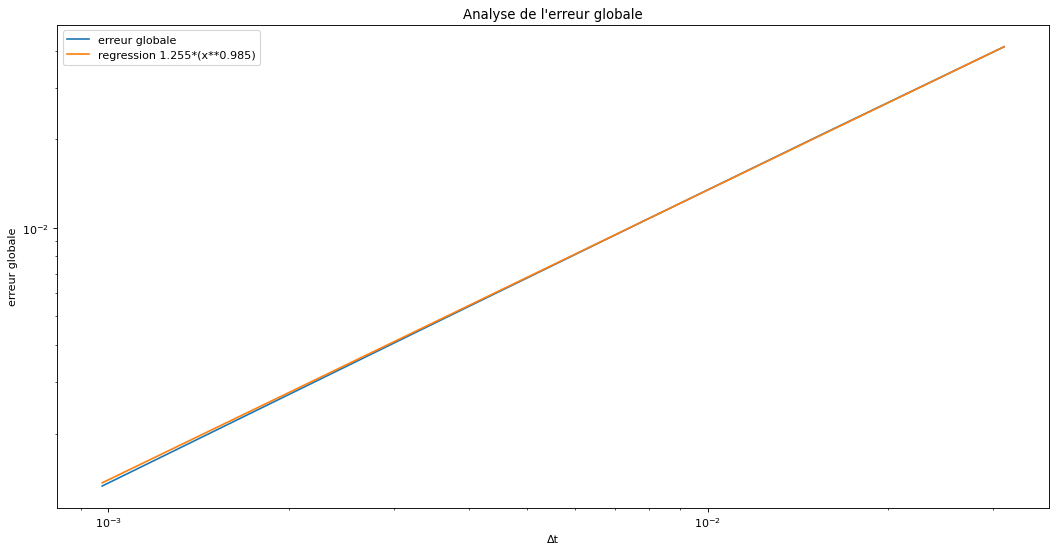

l'erreur globale est proportionelle à Δt à la puissance 0.9850202546512095


In [9]:
# Tracer la courbe d'erreur global en fonction de N en échelle log-log
plt.figure(figsize=(16, 8), dpi=80)

en = np.zeros(6)
delta_t = np.zeros(6)
for i in range(5, 11):
    t, tab_y = test_Euler_explicite(n=2**i, tn=1, y0=1)
    en[i-5] = np.max(abs(np.exp(t) - tab_y)) 
    delta_t[i-5] = 1/(2**i)

plt.title("Analyse de l'erreur globale")
plt.plot(delta_t, en, label="erreur globale")

#alors, vérifions qu'on a le bon exposant avec une régression
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, delta_t, en)
plt.plot(delta_t, myExpFunc(delta_t, *popt), label= "regression {0:.3f}*(x**{1:.3f})".format(*popt))

plt.xlabel("Δt")
plt.ylabel("erreur globale")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

print(f"l'erreur globale est proportionelle à Δt à la puissance {popt[1]}")


## Exercice 3 : Euler implicite et différentes notions de stabilité

On s'intéresse dans un premier temps au comportement du schéma d'Euler implicite, puis on compare son comportement à celui du schéma d'Euler explicite.

**<big> Partie 1 : Euler implicite</big>**

### Question 1

$1$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Implémenter le schéma d'Euler implicite pour le problème 

$$ \left\{ \begin{array}{rl} y'(t) &= f\left(t, y(t)\right),\\ y(0) &= y_0. \qquad{}\end{array}\right. $$

*Indication pour l'implémentation :* On utilisera un algorithme de Newton pour la résolution de l'équation non-linéaire scalaire satisfaite par les $y_{n+1}$. On fixera par défaut une tolérance $TOL=10^{-12}$ sur le résidu $|f(x)|$ et un nombre maximal $N_{\max}=100$ d'itérations dans cet algorithme. 

**Attention :** *Si la tolérance n'est pas atteinte à la dernière itération, votre algorithme devra renvoyer un message d'avertissement.*

Pour ce faire, on pourra pour cela 
- soit implémenter (exploiter l'implémentation de la PC5) un algorithme de Newton scalaire en implémentant le message en cas de non-convergence, 
- soit utiliser la fonction *newton* de scipy.optimize (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) avec les options 
    - *tol* qui fixe la tolérance
    - *maxiter* qui fixe le nombre maximum d'itérations
    - *fprime* qui donne la fonction dérivé à l'algorithme,
    - *full_output=True* qui impose à l'algorithme de renvoyer (x, r) où x est le zéro approché à la dernière itération et r est un objet contenant les informations de convergence. En particulier r.converged est True si l'algorithme a atteint la convergence et False sinon
    - disp=False qui empêche l'algorithme de s'arrêter en cas de non-convergence.
    
$2$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Tester cet algorithme sur la fonction de l'exercice 1, $f(t,y) = y$ avec $t_0=0$, $y_0=1$ et $T=1$ et $N=2^{5}$ pas de temps et comparer avec la solution exacte. 

$3$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Comme pour le schéma explicite, la solution numérique $y_n$ donnée par le schéma implicite avec ce second membre a une forme simple. Que valent les $y_n$ ? Vérifier que votre solution numérique est bien identique à celle-ci.

In [10]:
def Newton_scalaire(f, df, x0, tol=1.e-12, N_max=100):
    """
    Calcule une solution approchée du problème f(x)=0 par la méthode de Newton
    ----------   
    parametres:
    f      : fonction dont on cherche le zero
    df     : fonction dérivée de f
    x_0    : valeur initiale de la suite
    tol    : on utilise | f(x_n) | < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    x  : x_n à la dernière itération
    
    !!! afficher un message d'avertissement si on n'a pas convergé (si on n'a pas | g(x) | < tol) !!!
    """  
    x_n = x0
    eps_n = 1
    
    n = 1
    while (n < N_max and eps_n >= tol):
        y = x_n - f(x_n)/df(x_n) #on calcule x_{n+1}
        
        eps_n = abs(y - x_n)
        x_n = y
        n += 1
    
    if(abs(f(x_n)) >= tol):
        print("La méthode n'a pas convergé!!")
        
    return x_n

In [11]:
# Cellule de test pour valider votre fonction Newton_scalaire (voir tests unitaires de la PC5)
# ou pour tester scipy.optimize.newton

def f1(x):
    # définition de f1
    return np.exp(x) - 2

def df1(x):
    # définition de la dérivée de f1
    return np.exp(x)

# Test sur f1
x_1 = Newton_scalaire(f1, df1, 0.5)
print(x_1)
print(f"f1(resultat) = {f1(x_1)}")


0.6931471805599454
f1(resultat) = 0.0


In [12]:
def Euler_implicite(f, df, y0, t):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler implicite
    ----------   
    parametres:
    f       : fonction second membre (dépend de y et de t)
    df      : fonction dérivée de f (dépend de y et de t)
    y_0     : valeur au temps t_0
    t       : tableau contenant les temps t_0, t_1, ..., t_N
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération
    """ 
    n = len(t)
    tab_y = np.zeros(n)
    
    #parametres pour g et dg
    yn = y0
    tn = 0
    delta_t = 1/(n-1)
    
    # --- Bloc à modifier et à placer dans votre fonction ---
    # construire la fonction satisfaite par y_n+1 et sa dérivée à partir de f et df
    def g(x):
        # fonction dont on cherche le zéro 
        return x - yn - delta_t*f(tn + delta_t, x)
    def dg(x):
        # dérivée de la fonction dont on cherche le zéro 
        return 1 - delta_t*df(tn + delta_t, x)
    # --- Fin du bloc ---
    
    tab_y[0] = y0
    for i in range(1, n):
        yn = tab_y[i-1] #update yn
        tn = t[i-1] #update tn
        tab_y[i] = Newton_scalaire(g, dg, tab_y[i-1])
    
    return tab_y

In [13]:
def f_1(t, y):
    # fonction second membre
    return y

def df_1(t, y):
    # fonction dérivée de f_1 en fonction de y
    return 1

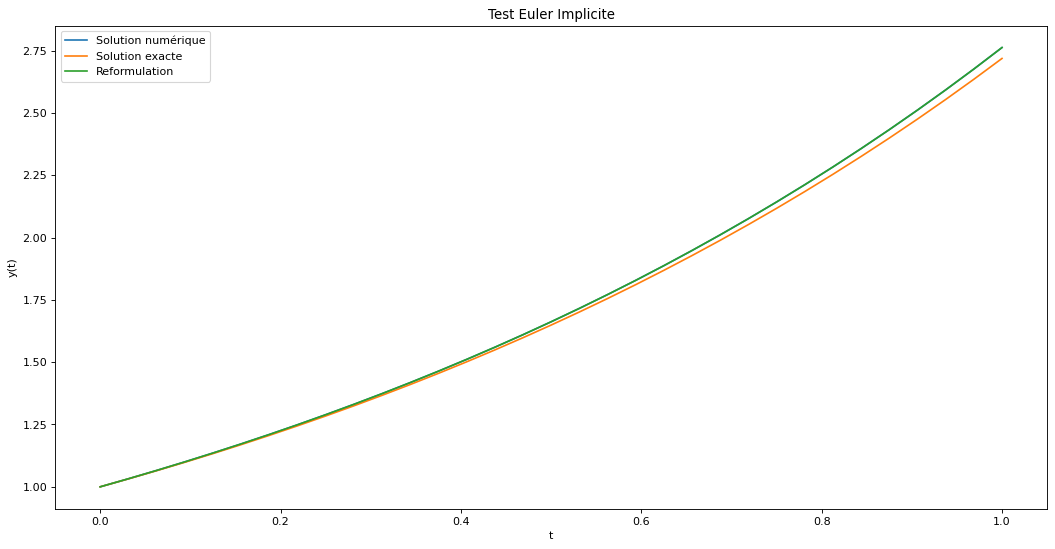

In [14]:
# Tracer la solution numérique obtenu avec le schéma d'Euler implicite
# Comparer à la solution exacte 
# Comparer à la reformulation simple dans le cas de la fonction f1

n = 2**5
t = np.linspace(0, 1, n+1)
tab_y = Euler_implicite(f_1, df_1, 1, t)

plt.figure(figsize=(16, 8), dpi=80)
plt.title("Test Euler Implicite")
plt.plot(t,  tab_y, label="Solution numérique")
plt.plot(t, np.exp(t), label="Solution exacte")

y_reformulation = 1/((1 - t[1])**(n*t)) #y_n = y_0/(1 - 1/N)^n
plt.plot(t, y_reformulation, label="Reformulation")
#on verifie que |y_numerique - y_reform| == 0
assert( np.array_equal( np.round(tab_y - y_reformulation), np.zeros(n+1)) == True)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    En effet, la solution numérique coincide avec la reformulation
    $$ y_n = \frac{y_0}{\left(1 - \frac{1}{n}\right)^N}$$.
</div>

**<big> Partie 2 : A-stabilité</big>**

### Question 2 : Équation logistique

On va maintenant tester cet algorithme sur l'équation logistique

$$\left\{
    \begin{aligned}
        y'(t) &= ky(t)(1-y(t)) \\
        y(0) &= y_0,
    \end{aligned}
\right. \qquad{} (3)$$

où $k$ est une constante positive.

$1$. Vérifier que la solution est bien donnée par

$$ y(t) =  \frac{y_0 e^{kt}}{y_0 \left(e^{kt}-1\right) +1}. $$

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Tester votre algorithme d'Euler implicite sur l'exemple (3), avec $k=30$, $t_0=0$, $y_0=2$, $T=2$ et $\Delta t = 2^{-5}$, et afficher le résultat obtenu, ainsi que la solution théorique. Comparer avec le résultat donné par la méthode d'Euler explicite.


<div class="alert alert-block alert-info">
    On remarque que, par Cauchy-Lipschitz, l'équation admet une solution globale unique.
    On a
    $$\begin{align}
    y'(t) &= \frac{\left[ y_0ke^{kt} \cdot y_0(e^{kt} - 1) + 1 \right] - \left[ y_0e^{kt} \cdot y_0ke^{kt} \right]}{\left[y_0(e^{kt} - 1) + 1\right]^2} \\
    &= \frac{y_0ke^{kt} (1 - y_0)}{\left[y_0(e^{kt} - 1) + 1\right]^2}\\
    &= k \left(\frac{y_0e^{kt}}{y_0(e^{kt} - 1) + 1}\right) \left(\frac{1 - y_0}{y_0(e^{kt} - 1) + 1}\right)\\
    &= k y(t) (1 - y(t)).
    \end{align}$$
    Donc, $y(t)$ est bien la solution. 
</div>

In [15]:
k = 30

def f_2(t, y):
    # fonction second membre
    return k*y*(1-y)

def df_2(t, y):
    # fonction dérivée de f_2 en fonction de y
    return k*(1 - 2*y)

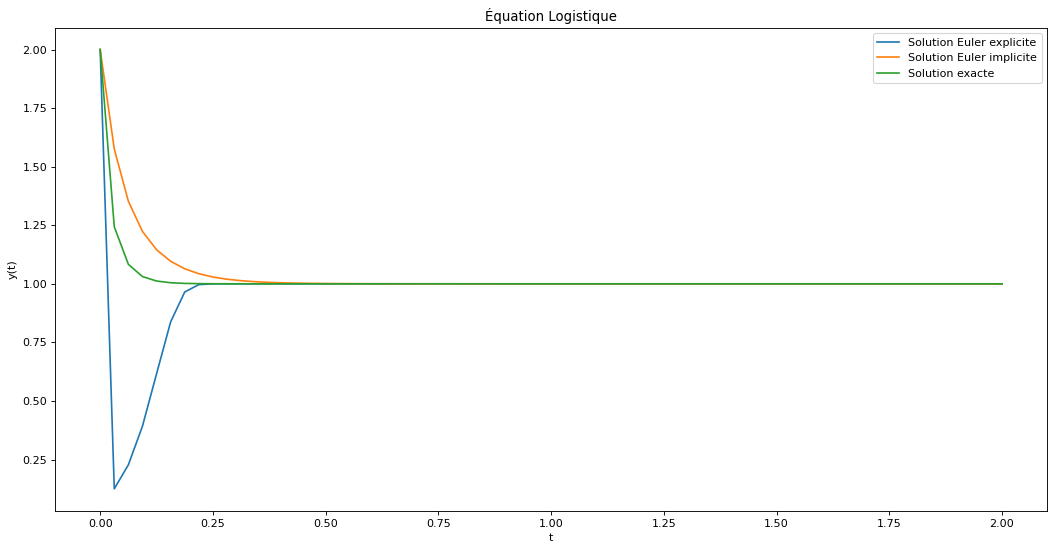

In [16]:
# Tracer la solution numérique donnée par les schémas d'Euler implicite et explicite
# avec les paramètres donnés pour la fonction 
# Comparer avec la solution exacte

t = np.linspace(0, 2, 65) #t0 = 0, T = 2 et delta_t = 2**-5
y0 = 2
tab_y_explicite = Euler_explicite(f_2, y0, t)
tab_y_implicite = Euler_implicite(f_2, df_2, y0, t)

plt.figure(figsize=(16, 8), dpi=80)
plt.title("Équation Logistique")
plt.plot(t, tab_y_explicite, label="Solution Euler explicite")
plt.plot(t, tab_y_implicite, label="Solution Euler implicite")

def y_exacte(t):
    return (y0*np.exp(k*t))/(y0*(np.exp(k*t) - 1) + 1)

plt.plot(t, y_exacte(t), label="Solution exacte")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()


### Question 3 : A-stabilité
>Un schéma numérique est dit *A-stable*, si lorsqu'on l'applique à l'équation
>
>$$  \left\{  \begin{aligned}
      y'&=\lambda y, \\
      y(0)&=1,
    \end{aligned} \right. 
\qquad{} (2)
$$
>
>avec $\Re(\lambda)<0$, alors la suite $\vert y_n\vert $ décroit vers $0$.
>
>Ce critère de A-stabilité a donc un sens uniquement pour les systèmes dissipatifs. Lors de la simulation de problèmes physiques, il arrive souvent que le système soit dissipatif seulement dans un certain régime. C'est également le cas à la question suivante.

1) Ecrire explicitement les suites données par les méthodes d'Euler explicite et implicite appliquées à (2).

2) **Euler implicite :** 

a) *$\lambda \in \mathbb{R}_{-}^{*}$ réel et strictement négatif* : 
Montrer que le schéma d'Euler implicite est A-stable (sans condition sur $\Delta t$).

b) *$\lambda \in \mathbb{R}_{+}^{*}$ réel et strictement positif* : 
Distinguer différents régimes en fonction de $\Delta t$ et $\lambda$, pour lesquels la méthode d'Euler implicite donne des résultats qualitativement différents (croissance, décroissance, limite, oscillations...) en comparaison de la solution exacte.

3) **Euler explicite :**

a) *$\lambda \in \mathbb{R}_{-}^{*}$ réel et strictement négatif* : 
Montrer que la méthode d'Euler explicite est seulement *conditionnellement* A-stable, c'est-à-dire qu'elle est A-stable seulement si le pas $\Delta t$ respecte une certaine condition liée à $\lambda$.
Distinguer différents régimes en fonction de $\Delta t$ et $\lambda$, pour lesquels la méthode d'Euler explicite donne des résultats qualitativement différents (croissance, décroissance, limite, oscillations...) en comparaison de la solution exacte.

b) *$\lambda \in \mathbb{R}_{+}^{*}$ réel et strictement positif* : 
Montrer que la suite des $y_n$ donnée schéma d'Euler explicite est strictement croissante (sans condition sur $\Delta t$).

<div class="alert alert-block alert-info">
    <h3>Euler implicite</h3>
    On a $y_{n+1} = y_n + \lambda \Delta t y_{n+1}$, ce qui donne
    $$ y_n = \left(\frac{1}{1 - \lambda \Delta t}\right)^n y_0. $$
    Supposons $\lambda \in \mathbb{R}_-^*$. $\\$
    Alors $\forall \Delta t > 0$, on a $\frac{1}{1 - \lambda \Delta t} < 1$ et donc le schéma d'Euler implicite est toujours A-stable. $\\$
    Supposons $\lambda \in \mathbb{R}_+^*$. $\\$
    Dans ce cas, la méthode d'Euler implicite est A-stable  $\iff \left\vert \frac{1}{1 - \lambda \Delta t} \right\vert < 1 \iff \Delta t > \frac{\lambda}{2}$.
</div>

<div class="alert alert-block alert-info">
    <h3>Euler explicite</h3>
    On a $y_{n+1} = y_n + \lambda \Delta t y_n$, ce qui donne
    $$ y_n = (1 + \lambda \Delta t)^n y_0. $$
    Supposons $\lambda \in \mathbb{R}_-^*$. $\\$
    Alors si $\Delta t < \frac{2}{|\lambda|}$ on a $|1 + \lambda \Delta t| < 1$ et dans ce cas le schéma d'Euler explicite est A-stable. $\\$
    Par contre, si $\Delta t > \frac{2}{|\lambda|}$, on a $|1 + \lambda \Delta t| > 1$ et dans ce cas le schéma d'Euler explicite n'est pas A-stable. $\\$
    Supposons $\lambda \in \mathbb{R}_+^*$. $\\$
    Alors $1 + \lambda \Delta t > 1 \implies y_n$ est strictement croissante. Donc $\forall \Delta t >0, y_n \to +\infty$.
</div>

### Question 4 : Une illustration sur un modèle jouet

On considère toujours l'équation logistique (3), cette fois-ci avec $y_0=0.0001$ (et toujours $t_0=0$, $T=2$ et $\Delta t = 2^{-5}$). 

$1$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Utiliser les algorithmes d'Euler explicite et implicite, d'abord pour $k=30$, puis pour $k=50$, et enfin pour $k=70$. Afficher les solutions obtenues (et la solutions théorique correspondante).

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  Commenter les résultats obtenus. *On pourra faire le parallèle avec le comportement des méthodes d'Euler explicites et implicites pour les équations $y'=ky$ et $y'=-ky$ comme étudié à la question 2.* 

La méthode n'a pas convergé!!


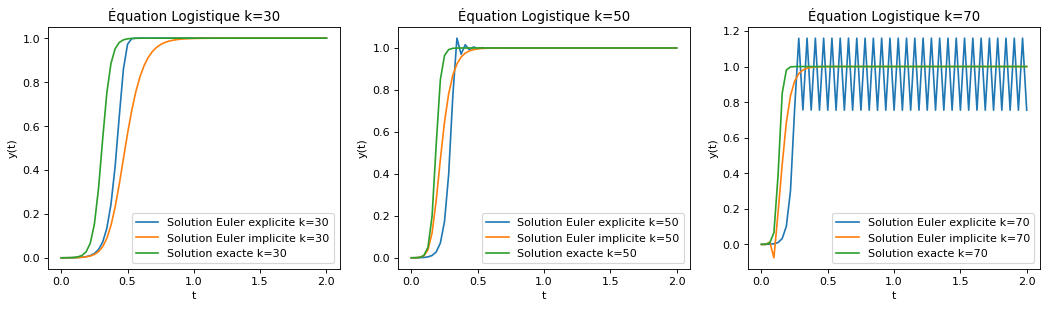

In [17]:
# Tracer les solutions numériques donnée par les schémas d'Euler implicite et explicite pour k=30
# Comparer avec la solution exacte

y0 = 0.0001
t = np.linspace(0, 2, 65) #t0 = 0, T = 2 et delta_t = 2**-5

k_values = np.array([30, 50, 70])

#On va tracer les solution pour tous les k dans un seul loop
plt.figure(figsize=(16, 4), dpi=80)
for k_value in k_values:
    k = k_value
    tab_y_explicite = Euler_explicite(f_2, y0, t)
    tab_y_implicite = Euler_implicite(f_2, df_2, y0, t)
    plt.subplot(1, 3, math.ceil(k/30.0)) #on trace chaque k dans un subplot
    plt.title(f"Équation Logistique k={k}")
    plt.plot(t, tab_y_explicite, label=f"Solution Euler explicite k={k}")
    plt.plot(t, tab_y_implicite, label=f"Solution Euler implicite k={k}")
    def y_exacte(t):
        return (y0*np.exp(k*t))/(y0*(np.exp(k*t) - 1) + 1)
    plt.plot(t, y_exacte(t), label=f"Solution exacte k={k}")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.legend()
    
plt.show()

**Réponse :** 

<div class="alert alert-block alert-info">
    Pour faire le parallèle avec la question précedent, on observe que la méthode d'Euler implicite est stable pour n'importe quelle valeur de $k$ mais la méthode d'Euler explicite est conditionnelment stable. Pour $k=50$, on observe que la méthode d'Euler explicite oscille avant de converger et pour $k=70$ elle n'a pas du tout convergé. $\\$
    D'autre part, pour $k=30$ un cas où les deux méthodes convergent, on observe que l'erreur globale est moins grand pour la méthode d'Euler explicite et qu'elle converge plus vite. Donc, il y a certains cas où la méthode d'Euler explicite est intéressant mais en pratique si on ne sait pas a priori si la méthode ira converger c'est plus intéressant d'implementer la méthode d'Euler implicite.
</div>